In [1]:
#Import all the libraries necessary to this research

#Data Preparation and Analysis
import pandas as pd
import numpy as np

#Data Visualization 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Machine Learning and Model Analysis
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# Disable Warnings
from warnings import filterwarnings

In [2]:
filterwarnings('ignore') 

# Part I: Research Question

# A1. PROPOSAL OF QUESTION
Using Hierarchical Clustering, can customers be segregated into clusters, and if separated well, what information can we gather from these new clusters?





# 


# A2. DEFINED GOAL
The defined goal of this analysis is to employ Hierarchical Clustering to effectively group customers into distinct segments, aiming to uncover valuable insights and patterns within these newly formed clusters.








# 












# Part II: Technique Justification


# B1. EXPLANATION OF PREDICTION METHOD

Clustering, or cluster analysis, is an unsupervised machine learning technique used to partition an unlabeled dataset or population into distinct groups. Its aim is to create clusters where data points within each group are more similar to each other and dissimilar to those in other groups, facilitating the organization of objects based on their similarities and differences (Priy, 2021).

Hierarchical clustering, also known as hierarchical cluster analysis or HCA, is an unsupervised clustering algorithm that arranges clusters in a hierarchical order from top to bottom. Similar to organizing files and folders on a hard disk, this algorithm groups similar objects into clusters, resulting in a collection of distinct clusters where objects within each cluster share broad similarities (Chauhan, 2019).


In the context of our experiment, the objective is to apply hierarchical data clustering following these steps:

1. Initially, each data point is treated as a single-point cluster, resulting in N clusters from N data points.
2. The algorithm identifies the two closest data points and combines them to create a new cluster, reducing the number of clusters to N-1.
3. The process continues by iteratively merging the two closest clusters at each step, further reducing the number of clusters to N-2.
4. These merging steps are repeated until only one cluster remains.

In our experiment, we will apply hierarchical clustering to explore the structure and relationships among the data points. While hierarchical clustering itself does not determine specific outcomes, it can provide valuable insights that may contribute to understanding factors related to customer churn in network companies.

By analyzing the resulting clusters, we can identify distinct customer groups with shared characteristics. These groups may offer insights into the underlying factors that contribute to customer churn. While the analysis does not directly determine the factors, it provides a framework for further investigation and exploration to uncover potential relationships and patterns that influence customer behavior.

Through this hierarchical clustering analysis, we aim to gain a deeper understanding of customer segmentation and identify potential indicators of customer churn in network companies.




# 












# B2. SUMMARY OF METHOD ASSUMPTION
In Hierarchical Cluster Analysis (HCA), there is a fundamental assumption called "monotonicity" regarding the merge operation. This assumption states that when two clusters are combined, the distance between them will not be smaller than the distance between any previously merged clusters. In other words, as we continue merging clusters, the distances between the merged clusters will either remain the same or become larger.



# 









# B3. PACKAGES OR LIBRARIES LIST

To produce visual representations of the data analysis by combining code and text reports, I will utilize Jupyter Notebook which will be executed using Python. I chose Python for the following reasons:  
- Because of its robustness in analyzing and summarizing data.
- Python is also equipped with various libraries that enhance its functionality, save time, and reduce code complexity. 


Some of the libraries that are beneficial for this project include:

- Pandas, which facilitates the manipulation and analysis of data in rows and columns.
- Numpy, which enables the definition of arrays and complex matrices of all forms.
- Filterwarnings, which helps to ignore warning messages and enhances readability.
- Matplotlib, and Seaborn, which are used to create data visualizations.
- Statsmodels and Scikit-learn, which enable the development of statistical and predictive models.
- Sklearn: Python library for machine learning that offers various functionalities for creating statistical models. It provides several capabilities, including data splitting into training and test sets, offering machine learning model objects (in this case Hierarchical Clustering), tuning optimal model parameters, and analyzing the performance of the model.
 
 

# 









# Part III: Data Preparation

# C1. DATA PREPROCESSING

- My objective in preparing the data is to ensure that only compatible features for the hierarchical clustering model are included as inputs.
- In hierarchical clustering analysis (HCA), numerical values of data points are utilized and progressively merged into larger clusters.
- Any qualitative data will be either transformed into quantitative data or excluded. The remaining variables will be scaled in a standardized manner to prevent large numerical variables from exerting more influence than smaller numerical variables.

# 










# C2. DATA SET VARIABLES

 - The attributes selected for this model are:
    Age, Income, Outage_sec_perweek, MonthlyCharge, Bandwidth_GB_Year, Email, Contacts, Yearly_equip_failure, Tenure, Population, Children.
    
 - All of these attributes are continuous in nature .
 
 - It is important to note that the survey response variables (Item1, to Item8), which are also numerical attributes but not included in this list, have been excluded from the analysis. The focus is solely on these selected continuous attributes to uncover underlying patterns and characteristics associated with the customer data.



# 









# C3. STEPS FOR ANALYSIS

# Step 1
Import data: To begin, the churn dataset will be imported into a pandas dataframe for further analysis and processing.

In [3]:
churn_data = pd.read_csv('churn_clean.csv')
pd.options.display.max_columns = None

churn_data.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


# 





# Step 2

Explore the data: Review the data types of all attributes and identify the ones that necessitate further analysis for better understanding and processing.

In [4]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

# 



# Step 3

In this analysis, all irrelevant columns will be eliminated. This includes both categorical and numerical features that hold no significance and do not contribute to the analysis.

In [5]:
columns = ['StreamingTV', 'State', 'Zip', 'Techie', 'County', 'Customer_id', 'OnlineSecurity', 'Phone', 'Interaction', 'Tablet',
           'DeviceProtection', 'Job', 'Gender', 'TechSupport', 'CaseOrder', 'PaymentMethod', 'City', 'Port_modem', 'Churn',
           'Marital', 'PaperlessBilling', 'Area', 'Contract', 'OnlineBackup', 'StreamingMovies', 'TimeZone', 'InternetService',
           'Multiple', 'Lng', 'UID', 'Lat', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']


# Reference: G1

churn_data = churn_data.drop(columns, axis = 1)

In [6]:
churn_data

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,38,0,68,28561.99,7.978323,10,0,1,6.795513,172.455519,904.536110
1,10446,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,800.982766
2,3735,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,2054.706961
3,13863,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,2164.579412
4,11352,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,271.493436
...,...,...,...,...,...,...,...,...,...,...,...
9995,640,3,23,55723.74,9.415935,12,2,0,68.197130,159.979400,6511.252601
9996,77168,4,48,34129.34,6.740547,15,2,0,61.040370,207.481100,5695.951810
9997,406,1,48,45983.43,6.590911,10,0,0,47.416890,169.974100,4159.305799
9998,35575,1,39,16667.58,12.071910,14,1,0,71.095600,252.624000,6468.456752


# 




#  Step 4 

Normalize the array features along the same axis: This procedure is performed to address variations in numerical data sizes across different features. By scaling the features, we ensure that no single feature has a disproportionate influence on the model compared to others.

In [7]:
churn_data_scale = normalize(churn_data)   # Reference: G2

# 






# C4. CLEANED DATA SET

In [8]:
# Convert the scaled numpy array into a pandas dataframe.

churn_data_cols = churn_data.columns
churn_data_scaled = pd.DataFrame(churn_data_scale, columns=churn_data_cols)

In [9]:
# Export Dataframe as an Excel File

churn_data_scaled.to_excel('churn_data_scaled_clean.xlsx', index = False, encoding = 'utf-8') # Reference: G3

# 








# D1. OUTPUT AND INTERMEDIATE CALCULATIONS

To implement the Hierarchical Clustering technique for this analysis, the following steps will be performed:

1. The scaled dataframe will be visualized as a dendrogram to determine the optimal number of clusters, denoted as "n".
2. The data will be divided into training and test sets.
3. An Agglomerative Clustering model object will be instantiated and fitted to both the training and test sets.
4. The accuracies of the model will be assessed for both the training and test data using the silhouette score.

All these intermediate calculations will be executed in section D2, following the specific order of the code blocks.

# 










# D2. CODE EXECUTION

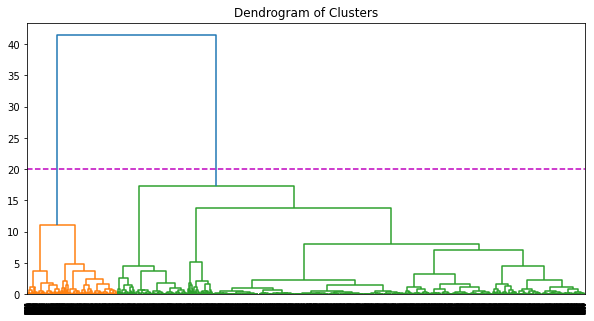

In [10]:
# Visualize Clusters in a Dendogram  # Reference: G4

plt.figure(figsize=(10, 5))  
plt.title("Dendrogram of Clusters")  
dg = shc.dendrogram(shc.linkage(churn_data_scaled, method='ward'))
plt.axhline(y=20, color='m', linestyle='--')

# 


 Based on the dendrogram above, we have two clusters 

In [11]:
# Instantiate a hierarchical clustering model with two clusters and fit it to the training data    # Reference: G4
k = 2 

HC = AgglomerativeClustering(n_clusters=k , linkage="ward", affinity="euclidean")
HC.fit(churn_data_scaled)

AgglomerativeClustering(affinity='euclidean')

In [12]:
# Generate silhoutette score for the train data   # Reference: G5

churn_ss = silhouette_score(churn_data_scaled,HC.labels_)    
churn_ss

0.6624796236994631

# 








# E1:ACCURACY OF CLUSTERING TECHNIQUE

In [13]:
# Display the silhouette score for the training data.

print("Silhouette Score of the data set: {:.2f}".format(churn_ss))

Silhouette Score of the data set: 0.66


# 


Once the clustering model has been instantiated and trained on both the training and test sets, its accuracy is assessed to determine its predictive capabilities based on its parameters. The evaluation metric used for this assessment is the Silhouette score. The Silhouette Coefficient, ranging from -1 to 1, is a measure of how well a clustering technique performs.

 - A score of 1 indicates that the clusters are well-separated and clearly distinct from each other.
 - A score of 0 implies that the clusters are indistinguishable or that the distances between clusters are insignificant.
 - A score of -1 suggests that the clusters have been misassigned or improperly clustered (Bhardwaj, 2020).
 
In this case, the Silhouette scores for the data is 0.66. This score indicates a reasonably high level of separation between the clusters, indicating that they are fairly distinct from one another, but there is more room for improvement.

# 





# E2. RESULTS AND IMPLICATIONS

Based on the aforementioned results, it can be concluded that this analysis is capable of moderately clustering customers into distinguishable groups or segments. The model demonstrates a subpar level of accuracy, although it falls short of achieving nearly perfect clusters. While it can successfully cluster customers to some extent, it does not fully separate them into distinct groups that would yield highly valuable insights.

# 
 




# E3. LIMITATION

A notable limitation of this analysis was the selection of numerous features, leading to a time-consuming dendrogram generation. The presence of widely spread data possibly caused overlapping, resulting in less distinct and loosely bound clusters. To address this, a systematic reduction of selected features could be explored to improve cluster tightness and accuracy.

# 






# E4. COURSE OF ACTION
To provide stakeholders with valuable insights, I suggest conducting extensive and systematic analysis. This involves exploring different approaches to increase accuracy and achieve distinct customer segmentation. Several strategies can be pursued, including fine-tuning model parameters such as linkage and affinity, experimenting with data point reduction techniques, and even considering alternative clustering models like Divisive Clustering or K-Means Clustering. By implementing these actions, we aim to optimize the clustering process, leading to tighter clusters and improved insights for decision-making.

# 







# F. PANOPTO RECORDING

# 




# G. SOURCES FOR THIRD-PARTY CODE

G1. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

G2. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html 

G3. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html

G4. https://www.w3schools.com/python/python_ml_hierarchial_clustering.asp#:~:text=Hierarchical%20clustering%20is%20an%20unsupervised,need%20a%20%22target%22%20variable.

G5. https://www.margaretsabelhaus.com/post/2022-05-31-hierarchical-clustering-tut/hierarchical-clustering/#:~:text=Thus%2C%20the%20silhouette%20score%20is,1%3A%20clusters%20are%20incorrectly%20assigned

# 







# H. SOURCES

H1. Priy S. (2021, Spetember 21) Clustering in Machine Learning. Retrieved July 10 2023 at https://www.geeksforgeeks.org/clustering-in-machine-learning/ 

H2. Chauhan NS. (2019, September 27) What is Hierarchical Clustering? Retrieved July 10 2023 at https://www.kdnuggets.com/2019/09/hierarchical-clustering.html 

H3. Bhardwaj A. (2020, May 26) Silhouette Coefficient. Validating clustering techniques. Retrieved July 10 2023 at https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c#:~:text=Silhouette%20Coefficient%20or%20silhouette%20score%20is%20a%20metric%20used%20to,each%20other%20and%20clearly%20distinguished. 